# Biblical model finetuned from GPT-2

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

from gpt2.finetune import get_model, evaluate

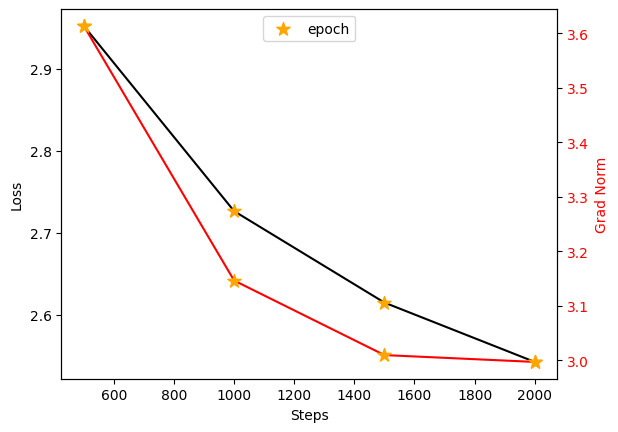

In [2]:
log = EventAccumulator('./checkpoints/runs/Apr24_20-34-05_gn-1/events.out.tfevents.1713983646.gn-1.7675.0')
log.Reload()

loss = [event.value for event in log.Scalars("train/loss")]
grad_norm = [event.value for event in log.Scalars("train/grad_norm")]
steps = [event.step for event in log.Scalars("train/loss")]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color="black")
ax1.plot(steps, loss, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.scatter(steps, loss, color="orange", marker="*", label="epoch", zorder=10, s=100)
ax1.legend(loc="upper center")

ax2 = ax1.twinx()
ax2.set_ylabel('Grad Norm', color="red")
ax2.plot(steps, grad_norm, color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.scatter(steps, grad_norm, color="orange", marker="*", zorder=10, s=100)

plt.show()

In [3]:
models = {
    # "gpt2 (initial)": "gpt2",
    "epoch 1": "./checkpoints/checkpoint-491",
    # "epoch 2": "./checkpoints/checkpoint-982",
    "epoch 3": "./checkpoints/checkpoint-1473",
    # "epoch 4": "./checkpoints/checkpoint-1964",
    "epoch 5": "./checkpoints/checkpoint-2455",
}

In [4]:
prompts = ["The meaning of life is this:",
           "Go to Heaven for the climate, Hell for the company.",
           "Only the free of sin can freely kill whomever he wants."]
temperatures = [1.0]
maximum = 200
top_k = None

In [5]:
for which, tag in models.items():
    model = get_model(tag)
    
    for temperature in temperatures:
        print(f"\n\033[91m Temperature:\033[0m {temperature}")
        for prompt in prompts:
            print(f"\n\033[92m Prompt:\033[0m {prompt}")
            
            output = evaluate(model, prompt, generate=maximum, temperature=temperature, top_k=top_k)
            print(f"\033[91m {which}:\n\033[0m {output} ...")


 Temperature: 1.0

 Prompt: The meaning of life is this:
 epoch 1:
 The meaning of life is this: "You shall not die, but you shall live. You shall know that I am Yahweh your God, the God of your fathers, who has given you life, that you may live in the land which I have given to you, and to the children of Israel. I will give you a land in which you will live, even as you have lived in it. The land will be your inheritance forevermore. It will not be taken away from you; neither will it be given away to anyone who doesn't possess it." The word of God came to Moses and Aaron, saying, "Speak to them, brothers, concerning this matter. Behold, they will say, 'This is the law of Moses, which he commanded us to do.'" Moses said to all the men of the house of Jacob, to whom he spoke this commandment, "'This land is mine. This is my covenant with you. Don't be afraid, for ...

 Prompt: Go to Heaven for the climate, Hell for the company.
 epoch 1:
 Go to Heaven for the climate, Hell for the co